# Learning Objectives

#### ✔ **Familiarity with plotnine/ggplot** 

Pratice making charts in plotnine. Get comfortable with the tool, we're going to keep using it! 

#### ✔ **Exploratory Data Viz -- Interpreting data** 

Once you plot a chart (for example a scatter plot with a very strong correlation), it can be tempting to start drawing conclusions. But beware! What conclusions can you draw? What conclusions can't you draw? Be careful with your words as you interpret the chart. Even good data, if interpreted incorrectly, can be misleading, and can ultimately lead you to tell an incorrect or misleading story.

## Mtcars

According to the [documentation of mtcars we found by Soren Heitmann](https://rstudio-pubs-static.s3.amazonaws.com/61800_faea93548c6b49cc91cd0c5ef5059894.html), this dataset was built with a few questions in mind.

> The following table is a discussion of variables in the R mtcars dataset. It was developed in response to the Coursera Regression Models class in the Data Science Specialization taught by Prof. Brian Caffo for the course project assignment: “You work for Motor Trend, a magazine about the automobile industry. Looking at a data set of a collection of cars, they are interested in exploring the relationship between a set of variables and miles per gallon (MPG) (outcome). They are particularly interested in the following two questions: ‘Is an automatic or manual transmission better for MPG’ and ‘Quantify the MPG difference between automatic and manual transmissions’”


You don't yet have the right mathematical tools to answer those questions. But exploratory data viz is a good first step in 1) defining what the questions you have and 2) getting a sense of the scope of the dataset and the "shape" of the data. In this notebook, I'd like for you to use the tools you have to explore the mtcars dataset. Eventually we will get around to trying to answer the questions he lays out. For now, focus on exploring the data, asking qusetions of it, and using plots to help answer the questions. Intepret the results of your plots carefully! 

Here is the dataset. I've added a column to make the `am` variable more human readable. You may want to do the same for a few other columns too if you plan to put them in your charts:

In [1]:
from plotnine.data import mtcars
from plotnine import ggplot, aes, geom_point, labs, theme_bw, facet_wrap, geom_smooth

# give transmission_type a human readable name rather than 0 or 1
mtcars['transmission_type'] = mtcars['am']\
    .apply(lambda x: {0: 'automatic', 
                      1: 'manual'}[x])

# Extract `brand` from name
mtcars['brand'] = mtcars['name'].str.split(expand=True)[0]

# Display the dataset
mtcars

/Users/luizfernandotoledo/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,transmission_type,brand
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,manual,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,manual,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,manual,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,automatic,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,automatic,Hornet
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,automatic,Valiant
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,automatic,Duster
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,automatic,Merc
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,automatic,Merc
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,automatic,Merc


# Exploring data

Remember, take a look at the data itself, calculate summary statistics if you find them useful, google for context to learn about what the variables mean, use histograms/scatterplots/etc... If you need, you can also add columns like I have done above. You won't fully wrap your head around the dataset (yet!) until we get to regressions, but let's see what you can tell us about it with your exploratory data viz.

Keeping in mind some of the resources we have to consult, including (but not limited to!):

- Official [plotnine documentation](https://plotnine.readthedocs.io/en/stable/)
- The [documentation of mtcars we found](https://rstudio-pubs-static.s3.amazonaws.com/61800_faea93548c6b49cc91cd0c5ef5059894.html) that someone had helpfully compiled
- Jonathan Soma's [plotnine reference guide](https://jsoma.github.io/plotnine-reference/chart-types/bar-graph/)
- Chatting with your classmates
- Official [ggplot2 documentation](https://ggplot2.tidyverse.org/reference/)
- Various online tutorials or YouTube videos on plotnine/ggplot2
- Forums like StackOverflow
- Google

Let's start doing some exploratory data visualization with plotnine! Take a look at the example below:

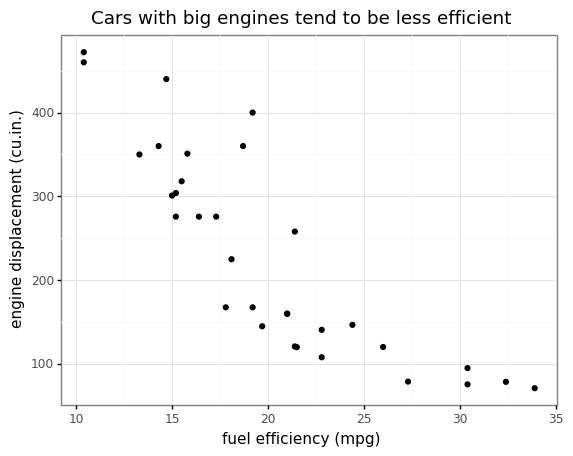

<ggplot: (271715054)>

In [5]:
display(
    ggplot(mtcars,                   # data
        aes('mpg', 'disp'))          # aesthetics
        + geom_point()               # geometry
        + theme_bw()
        + labs(
            title = "Cars with big engines tend to be less efficient",
            y = "engine displacement (cu.in.)",
            x = "fuel efficiency (mpg)"
        )
)   

**Summary:**

According to [Soren Heitmann](https://rstudio-pubs-static.s3.amazonaws.com/61800_faea93548c6b49cc91cd0c5ef5059894.html), the engine displacement of a car is a good proxy for the total amount of power the engine can generate. As you can see in the chart above, among the cars that Motor Trend looked at, those with that generated more power tended to be less fuel efficient.

**Reflection**

What I can conclude based on this chart:
- Among the cars that motortrend analyzied, the cars with bigger engines have lower fuel efficiency
- Bigger engines are correlated with lower fuel efficiency

What I can't conclude based on this chart:
- Bigger engines are less efficient. 
    - In order to come to this conclusion, I would also need to 👉you would have to check other brands

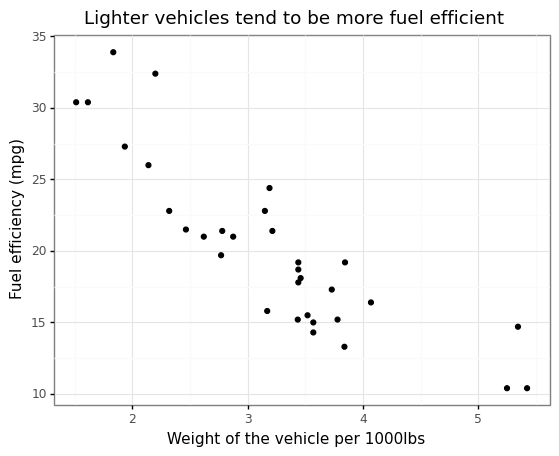

<ggplot: (345092045)>

In [17]:
# 👉Chart 1
# Insert code for a plotnine chart below


(
    ggplot(mtcars,                   # data
        aes('wt', 'mpg'))          # aesthetics
        + geom_point()               # geometry
        + theme_bw()
        + labs(
            title = "Lighter vehicles tend to be more fuel efficient",
            y = "Fuel efficiency (mpg)",
            x = " Weight of the vehicle per 1000lbs"
        )
)   



**👉Chart 1 Summary**

[Studies](https://www.cambridge.org/core/journals/mrs-bulletin/article/fuel-efficiency-drives-the-auto-industry-to-reduce-vehicle-weight/E0FB42ED85665AE90D06DF7A9CC3FD9F) show that the auto industry reduced vehicle weight in order to get more fuel efficiency. This chart shows that lighter vehicles tend to have more fuel eficiency.

**👉Reflection**

What I can conclude based on this chart:
- Among the cars that motortrend analyzed, lighter vehicles had more fuel eficiency.
- There is correlation between weight and fuel eficiency.
    
What I can't conclude based on this chart:
- I don't know how much the weight impacts the eficiency and this would change according to other variables (having bigger or smaller engines, etc).


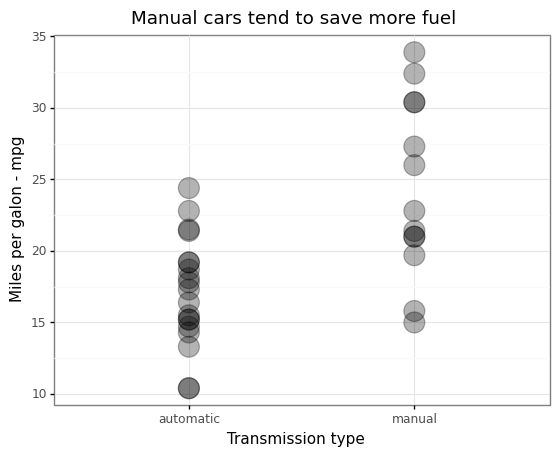

<ggplot: (344551843)>

In [50]:
# 👉Chart 2
# Insert code for a plotnine chart below
(
    ggplot(mtcars,                   # data
        aes('transmission_type', 'mpg'))          # aesthetics
        + geom_point(alpha = 0.3, size = 8)               # geometry
        + theme_bw()
        + labs(
            title = "Manual cars tend to save more fuel",
            y = "Miles per galon - mpg",
            x = " Transmission type"
        )
)   




**👉Chart 2 Summary**

[This test](https://www.consumerreports.org/cro/2012/01/save-gas-and-money-with-a-manual-transmission/index.htm) shows that manual cars can save gasoline. The chart goes on the same way, saying that there are more manual cars with more fuel eficiency than automatic cars.

**👉Reflection**

What I can conclude based on this chart:
- Manual cars had superior fuel eficiency than the automatic cars on the list
    
What I can't conclude based on this chart:
- I'm not sure if this applies to other cars outside of this list or if there are other factors involved


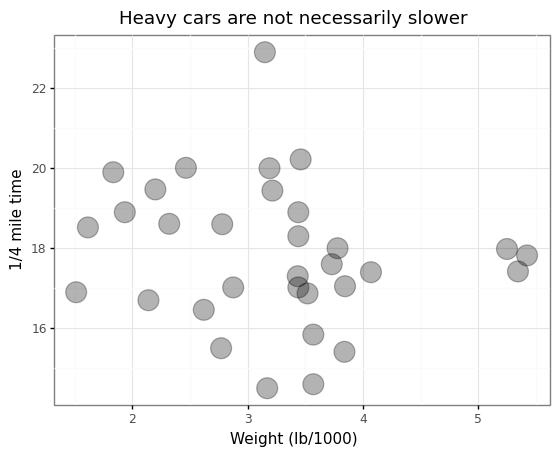

<ggplot: (345380069)>

In [61]:
# 👉Chart 3
# Insert code for a plotnine chart below



(
    ggplot(mtcars,                   # data
        aes('wt', 'qsec'))          # aesthetics
        + geom_point(alpha = 0.3, size = 8)               # geometry
        + theme_bw()
        + labs(
            title = "Heavy cars are not necessarily slower",
            y = "1/4 mile time",
            x = "Weight (lb/1000)"
        
        )
)   





**👉Chart 3 Summary**

I tried to check if there's a relation between the car's weight and its acceleration (1/4 mile time). Data didn't show that as most cars are in the middle and with different acceleration times. 

**👉Reflection**

What I can conclude based on this chart:
- At least from this chart it is not possible to infer a correlation between weight and acceleration.
    
What I can't conclude based on this chart:
- Maybe that correlation exists but based in other variables (ex: what If we were analyzing the same engine for every car and changing only its weight. Would it make a difference?)



In [64]:
mtcars

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,transmission_type,brand
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,manual,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,manual,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,manual,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,automatic,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,automatic,Hornet
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,automatic,Valiant
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,automatic,Duster
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,automatic,Merc
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,automatic,Merc
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,automatic,Merc


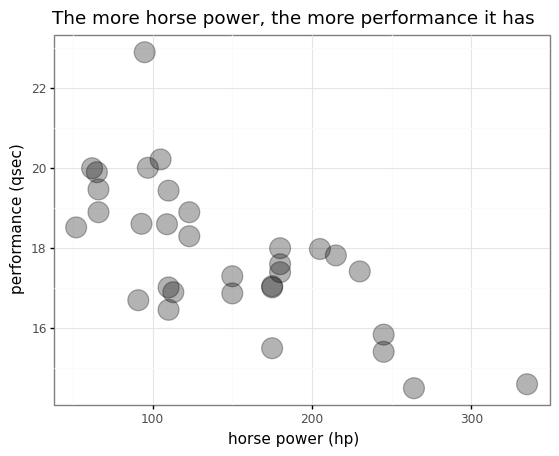

<ggplot: (344785378)>

In [76]:
# 👉Chart 4
# Insert code for a plotnine chart below

(
    ggplot(mtcars,                   # data
        aes('hp', 'qsec'))          # aesthetics
        + geom_point(alpha = 0.3, size = 8)               # geometry
        + theme_bw()
        + labs(
            title = "The more horse power, the more performance it has",
            y = "performance (qsec)",
            x = "horse power (hp)"
        
        )
)   


**👉Chart 4 Summary**

The more horse power (hp), the less it takes time to accelerate the car. There was even a [crazy Brazilian advertising](https://www.youtube.com/watch?v=BZ-rGoTOESE) comparing horse power performance to "poney power performance"

**👉Reflection**

What I can conclude based on this chart:
- The more horse power (hp), the less it should take to accelerate the car.
    
What I can't conclude based on this chart:
- It doesn't explain why cars with the same horse power have different performances.
